In [ ]:
import os
import librosa
import matplotlib.pyplot as plt
import numpy as np
import pandas  as pd
import utils 

Caricamento dei datasets

In [ ]:
#Carico i datasets
audio_files_target = utils.load_dataset('Dataset/Target')
audio_files_nonTarget = utils.load_dataset('Dataset/Non-Target')   

Estrazione delle frequenze di campionamento e plot delle stesse

In [ ]:
#TODO analisi per il resembling shannon Nyquist 
frequenciesTarget = utils.extractFrequencies(audio_files_target)
frequenciesNonTarget = utils.extractFrequencies(audio_files_nonTarget)
    
min = np.min(frequenciesTarget)
max = np.max(frequenciesTarget)

print(min, max)

min = np.min(frequenciesNonTarget)
max = np.max(frequenciesNonTarget)

print(min, max)

utils.plotFrequencies(frequenciesTarget,frequenciesNonTarget)

Caricamento dataset nel dataframe

In [ ]:
df_paths, df_names = utils.create_dataframe_from_files("Dataset")

In [ ]:
df_paths, df_names

Ricerca ed eliminazione dei duplicati

In [ ]:
duplicate_indices = utils.find_duplicates(df_names)
print(duplicate_indices)

Salvataggio del dizionario in un file json

In [ ]:
import json

# Convert the dictionary to a JSON string
duplicate_indices_json = json.dumps(duplicate_indices)

# Write the JSON string to a file
with open('Dataset/duplicate_indices.json', 'w') as f:
    f.write(duplicate_indices_json)

Eliminazione duplicati

In [ ]:
# Remove the duplicate rows
df_paths, df_names = utils.remove_rows(df_paths, df_names, 'Dataset/duplicate.txt', 'Dataset/df_paths.csv', 'Dataset/df_names.csv')

In [ ]:
df_names, df_paths

In [ ]:
#TODO dirgli di aggiornare il file di metadata, ci sono 1973 file su 2638
# TODO Vedere la frequenza massima di ogni audio,analisi canali e bitrate, e controllare il contenuto di tali frequenze e decidere se continuare ad abbassare il range di frequenze. Cercare di ridurre il più possibile. Secondo benedetto 192Khz.  

Estrazione delle durate degli audio e plot della distribuzione delle stesse

In [ ]:
audio_durations = utils.extract_durations('Dataset/df_paths.csv')

In [ ]:
audio_durations

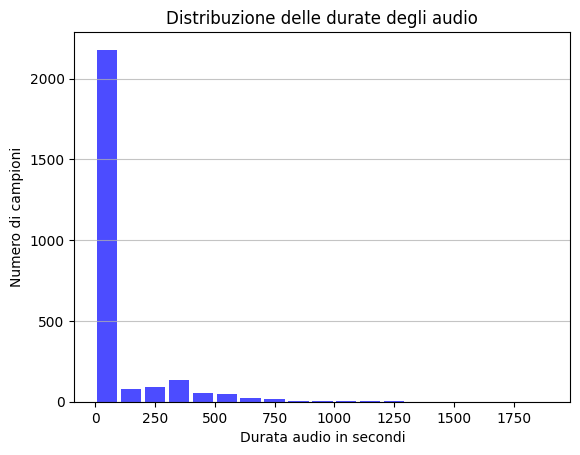

In [18]:
max_duration = max(audio_durations)
bins = np.arange(0, max_duration + 100, 100)

#per aumentare il livello di dettaglio basta mettere bins=auto
plt.hist(audio_durations, bins=bins, color='blue', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Durata audio in secondi')
plt.ylabel('Numero di campioni')
plt.title('Distribuzione delle durate degli audio')
    
plt.show()

Il trim andrebbe fatto intorno ai 750 secondi? La maggior parte dei campioni è distribuita entro quel valore